# CMSE 830 Project: Analyze and Predict Boston Housing Market
Dao Chi Lam

## Import Library

In [1]:
# import library
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as BS
import urllib.request
import urllib.parse
import urllib.error
import ssl
import re
import json

import censusdis.data as ced
from censusdis.datasets import ACS5
from censusdis import states

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.ops import unary_union
from shapely.geometry.polygon import Polygon
import geopandas as gpd

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option('display.max_rows', None)

## Data Collection

### Trulia Dataset

In [3]:
# def get_headers():
#     headers = {'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
#             'accept-language':'en-US,en;q=0.9',
#             'cache-control':'max-age=0',
#             'upgrade-insecure-requests':'1',
#             'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}
#     return headers

In [4]:
# ctx = ssl.create_default_context()
# ctx.check_hostname = False
# ctx.verify_mode = ssl.CERT_NONE

# sale = []
# address = []
# area = []
# bed = []
# bath = []
# school = []
# crime_rate = []
# commute = []
# shop_eat = []
# sugg_income = []
# descp = []
# feature = []
# addr_link = []
        

# urls = ["https://www.trulia.com/for_sale/3444_nh/1p_beds/ ",
#         "https://www.trulia.com/for_sale/3440_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/16187_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3453_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/33656_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3443_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/166019_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/16188_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3438_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3459_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3461_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3445_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3450_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3458_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/197101_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3448_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3449_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3457_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3463_nh/1p_beds/",
#         "https://www.trulia.com/for_sale/3447_nh/1p_beds/"]

In [5]:
# for x in urls:
#     count = 1
#     y = x
#     while(count < 9):  #will go till 8 pages = 240 records
#         print(x)
#         req = Request(x, headers = get_headers())  #req all headers
#         htmlfile = urlopen(req)
#         htmltext = htmlfile.read()
#         #print (htmltext)
#         soup = BS(htmltext,'html.parser')
#         #print (soup.prettify())
        
#         for tag in soup.find_all('div',attrs = {'data-testid' : 'pagination-caption'}):
#                 result = tag.get_text(strip = True) #save number of results for the search
#         try:
#             result1 = int(result.split('-')[0])
#             result2 = result.split(' ')[2]
#             result2 = int(result2.replace(',',''))
#         except:
#             pass
       
#         for tag in soup.find_all('div',attrs={'data-testid' : 'property-price'}): #sale
#                 sale_record = "NA"        
#                 sale_record = tag.get_text(strip = True)
#                 if not sale_record:
#                     sale_record = "NA"
#                 # print(sale_record)
#                 sale.append(sale_record)

#         for tag in soup.find_all('div',attrs={'data-testid' : 'property-street'}): #address
#                 address_record = "NA"
#                 address_record = tag.get_text(strip = True)
#                 if not address_record:
#                     address_record = "NA"
#                 # print(address_record)
#                 address.append(address_record)             
        
#         for tag in soup.find_all('div',attrs={'data-testid' : 'property-region'}): # area
#                 area_record = "NA"
#                 area_record = tag.get_text(strip = True)
#                 if not area_record:
#                     area_record = "NA"
#                 # print(area_record)
#                 area.append(area_record)
                
                
#         links = []                                   
#         for cards in soup.find_all('div',attrs={'class':'PropertyCard__PropertyCardContainer-sc-1ush98q-2'}):       
            
#             for link in cards.findAll('a', attrs={'href': re.compile("^/")}):\
#                 links.append("https://www.trulia.com" + link.get('href')) #appends all links in the page
       
#         #print(links) #picking up each link and reading inside it
#         for link in links:
#             addr_link.append(link)
#             req = Request(link, headers=get_headers())
#             htmlfile = urlopen(req)
#             htmltext = htmlfile.read()
#             #print (htmltext)
#             soup = BS(htmltext,'html.parser')  #reads inside links
#             #print("hello")
           
#             for tag in soup.find_all('div', attrs= {'class': 'Grid__CellBox-sc-5ig2n4-0 fxOuBE'}):
#                 bed_record = "NA"
#                 bath_record = "NA"
#                 for tag2 in tag.find_all('li', attrs= {'data-testid': 'bed'}):
#                     bed_record = tag2.get_text(strip = True)
#                     if not 'Bed' in bed_record:
#                         bed_record= "NA"
#                 bed.append(bed_record)     
                
#                 for tag2 in tag.find_all('li', attrs = {'data-testid': 'bath'}):
#                     bath_record = tag2.get_text(strip= True)
#                     if not 'Bath' in bath_record:
#                         bath_record= "NA"
#                 bath.append(bath_record)
           
#             for tag in soup.find_all('div',attrs= {'aria-label': 'Schools'}):  #school
#                 school_record = "NA"
#                 school_record = tag.get_text(strip = True)
#                 if not school_record:
#                     school_record= "NA"
#                 # print(school_record)
#                 school.append(school_record)           
            
#             for tag in soup.find_all('div',attrs= {'aria-label': 'Crime'}):  #crime
#                 crime_record = "NA"
#                 crime_record = tag.get_text(strip = True)
#                 if not crime_record:
#                     crime_record= "NA"
#                 # print(crime_record)
#                 crime_rate.append(crime_record)
               
#             for tag in soup.find_all('div',attrs= {'aria-label': 'Commute'}): #commute
#                 commute_record = "NA"
#                 commute_record = tag.get_text(strip = True)
#                 if not commute_record:
#                     commute_record= "NA"
#                 # print(commute_record)
#                 commute.append(commute_record)
                
#             for tag in soup.find_all('div', attrs= {'aria-label': 'Shop & Eat'}): #shop and eat
#                 shopeat_record = "NA"
#                 shopeat_record = tag.get_text(strip = True)
#                 if not shopeat_record:
#                     shopeat_record = "NA"
#                 # print(shopeat_record)
#                 shop_eat.append(shopeat_record)
            
#             for tag in soup.find_all('div', attrs= {'class': 'HomeDetailsRentalAffordability__IncomeInformationContainer-epkvqi-0 jalLqQ'}):
#                 income_record = "NA"
#                 for tag2 in tag.find_all('span', attrs= {'class': 'Text__TextBase-sc-1i9uasc-0 dltAqT'}): #suggested income
#                     income_record = tag2.get_text(strip = True)    
#                     if not '$' in income_record:   
#                         income_record = "NA"
#                 sugg_income.append(income_record)
             
#             for tag in soup.find_all('div',attrs= {'data-testid': 'seo-description-paragraph'}): #descp
#                 descp_record = "NA"
#                 descp_record = tag.get_text(strip = True)
#                 if not descp_record:
#                     descp_record = "NA"
#                 # print(descp_record)
#                 descp.append(descp_record)
                
#             for tag in soup.find_all('div',attrs= {'data-testid': 'features-container'}): #feature
#                 feature_record = "NA"        
#                 feature_record = tag.get_text(strip= True)
#                 if not feature_record:
#                     feature_record = "NA"
#                 # print(feature_record)
#                 feature.append(feature_record)

        
#         if result1 + 30 >= result2: #stop loop from repetting itself
#             break
#         else:
#             count = count + 1
#             page = str(count) + "_p"  #changes page
#             x = y + page

In [6]:
# data_frame = pd.DataFrame(list(zip(sale, address, area, bed, bath, school, crime_rate, commute, shop_eat, descp, feature, addr_link)), columns = ["Sale", "Address", "Area", "Bed", "Bath", "School", "Crime", "Commute", "Shop_eat", "Description", "Feature", "URL"])
# data_frame

# data_frame.Area.value_counts()

# #Save the obtained dataframe to csv
# data_frame.to_csv('housing_data_scraped.csv', index = False)

### Census Dataset

In [7]:
# import censusdis.data as ced
# from censusdis.datasets import ACS5
# from censusdis import states

# def get_census_data(var_value, var_label):
#     df = ced.download(dataset = ACS5, vintage = 2022, download_variables = var_value, state = states.MA, tract = '*', with_geometry = True)
#     df = df.rename(columns={df.columns[i]: new_name for i, new_name in var_label.items()})
#     return df

# var_value  = ['NAME', 'B01001_001E', 'B19013_001E', 'B01002_001E', 'B25002_002E', 'B25002_003E', 'B08135_002E', 'B08135_003E', 'B08135_004E', 'B08135_005E', 'B08135_006E', 'B08135_007E', 'B08135_008E', 'B08135_009E', 'B08135_010E']
# var_label = {0: 'State', 
#              1: 'County', 
#              2: 'Tract', 
#              3: 'Location Name', 
#              4: 'Total Population', 
#              5: 'Median Household Income',
#              6: 'Median Age',
#              7: 'Occupied',
#              8: 'Vacant',
#              9: 'Work Commute < 10 minutes',
#              10: 'Work Commute 10-14 minutes',
#              11: 'Work Commute 15-19 minutes',
#              12: 'Work Commute 20-24 minutes',
#              13: 'Work Commute 25-29 minutes',
#              14: 'Work Commute 30-34 minutes',
#              15: 'Work Commute 35-44 minutes',
#              16: 'Work Commute 45-59 minutes',
#              17: 'Work Commute > 60 minutes',
#              18: 'Geometry'}

# census_df = get_census_data(var_value, var_label)
# census_df.to_csv('ma_census.csv', index = False)

### Redfin Dataset

In [8]:
# # import dataset
# active_listing_df = pd.read_csv('active_listings.csv')
# homes_sold_df = pd.read_csv('homes_sold.csv')
# median_sale_ppsf_df = pd.read_csv('median_sale_ppsf.csv')
# median_sale_price_df = pd.read_csv('median_sale_price.csv')

In [9]:
# # merge dataset: active_listing_df, homes_sold_df, median_sale_ppsf_df, median_sale_price_df
# df_merge_1 = active_listing_df.merge(homes_sold_df, left_on = 'Period Begin', right_on = 'Period Begin')
# df_merge_2 = df_merge_1.merge(median_sale_ppsf_df, left_on = 'Period Begin', right_on = 'Period Begin')
# redfin_merged_df = df_merge_2.merge(median_sale_price_df, left_on = 'Period Begin', right_on = 'Period Begin', suffixes = ("_q", "_z"))

# redfin_merged_df.to_csv('redfin.csv', index = False)

## Import Dataset

In [10]:
# import CSV dataset
trulia_df = pd.read_csv('housing_data_scraped.csv')
census_df = pd.read_csv('ma_census.csv')
redfin_df = pd.read_csv('redfin.csv')

## Initial Data Analysis

### Trulia Dataset

In [11]:
trulia_df.head()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
0,"$352,000",23 Eutaw St #2,"East Boston, Boston, MA",3 Beds,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeModerate crime relative to the rest of Su...,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...
1,"$368,000",132 Bremen St,"East Boston, Boston, MA",3 Beds,1 Bath,Schools8 Elementary Schools4 Middle Schools,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...
2,"$288,000",76 Havre St #2,"East Boston, Boston, MA",2 Beds,1 Bath,Schools5 Elementary Schools2 Middle Schools,CrimeHigh crime relative to the rest of Suffol...,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...
3,"$431,200",303 Maverick St #3,"East Boston, Boston, MA",4 Beds,1 Bath,Schools4 Elementary Schools3 Middle Schools1 H...,CrimeLowest crime relative to the rest of Suff...,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...
4,"$288,000",220 Saratoga St #1,"East Boston, Boston, MA",2 Beds,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...


In [12]:
trulia_df.shape

(3894, 12)

In [13]:
trulia_df.describe()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
count,3894,3894,3894,3892,3823,3894,3894,3894,3894,3894,3894,3894
unique,419,2659,50,14,15,284,11,23,1141,3085,2994,3085
top,"$400,000",Address Not Disclosed,"Roxbury, Boston, MA",2 Beds,1 Bath,Schools7 Elementary Schools,CrimeLowest crime relative to the rest of Suff...,Commute21% of residents commute by car.,Shop & Eat644 Restaurants65 Groceries220 Night...,"37 Telegraph St #3,Boston, MA is a 2 bedroom, ...",Home DetailsMulti FamilyNo pets allowed11 Days...,https://www.trulia.com/p/ma/boston/37-telegrap...
freq,146,408,267,1374,2887,163,1777,731,40,7,14,7


In [14]:
trulia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sale         3894 non-null   object
 1   Address      3894 non-null   object
 2   Area         3894 non-null   object
 3   Bed          3892 non-null   object
 4   Bath         3823 non-null   object
 5   School       3894 non-null   object
 6   Crime        3894 non-null   object
 7   Commute      3894 non-null   object
 8   Shop_eat     3894 non-null   object
 9   Description  3894 non-null   object
 10  Feature      3894 non-null   object
 11  URL          3894 non-null   object
dtypes: object(12)
memory usage: 365.2+ KB


### Census Dataset

In [15]:
census_df.head()

,State,County,Tract,Location Name,Total Population,Median Household Income,Median Age,Occupied,Vacant,Work Commute < 10 minutes,Work Commute 10-14 minutes,Work Commute 15-19 minutes,Work Commute 20-24 minutes,Work Commute 25-29 minutes,Work Commute 30-34 minutes,Work Commute 35-44 minutes,Work Commute 45-59 minutes,Work Commute > 60 minutes,Geometry
0,25,1,10100,Census Tract 101; Barnstable County; Massachus...,3630,91447.0,56.1,1996,2909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-70.245385 42.063733, -70.238087 42...."
1,25,1,10206,Census Tract 102.06; Barnstable County; Massac...,4352,97396.0,59.1,1975,2887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-70.0772923828467 41.9578449682566, ..."
2,25,1,10208,Census Tract 102.08; Barnstable County; Massac...,1627,89243.0,65.0,1031,2418,1090.0,380.0,690.0,2140.0,NaN,NaN,NaN,NaN,6805.0,"POLYGON ((-70.1542553579408 42.0771582964788, ..."
3,25,1,10304,Census Tract 103.04; Barnstable County; Massac...,2739,68633.0,60.6,1363,1572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-70.008462 41.800786, -70.003842 41...."
4,25,1,10306,Census Tract 103.06; Barnstable County; Massac...,2985,81078.0,57.6,1361,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-70.009013 41.876625, -70.0064441049..."


In [16]:
census_df.shape

(1620, 19)

In [17]:
census_df.describe()

,State,County,Tract,Total Population,Median Household Income,Median Age,Occupied,Vacant,Work Commute < 10 minutes,Work Commute 10-14 minutes,Work Commute 15-19 minutes,Work Commute 20-24 minutes,Work Commute 25-29 minutes,Work Commute 30-34 minutes,Work Commute 35-44 minutes,Work Commute 45-59 minutes,Work Commute > 60 minutes
count,1620.0,1620.000000,1620.000000,1620.000000,1586.000000,1600.000000,1620.000000,1620.000000,1161.000000,1166.000000,1167.000000,1166.000000,1156.000000,1166.000000,1165.000000,1163.000000,1163.000000
mean,25.0,17.000000,436432.550000,4311.237654,104108.629887,40.692188,1691.972222,159.456173,1059.603790,2454.163808,4098.140531,5348.979417,3475.674740,8874.056604,6993.772532,10567.196905,19837.347377
std,0.0,7.702305,265119.228267,1688.223489,46027.403016,7.855668,647.860771,311.575383,694.081145,1539.506278,2317.798640,2949.388790,2082.812269,4760.526710,4123.776393,6421.442837,12711.592861
min,25.0,1.000000,101.000000,0.000000,16095.000000,19.700000,0.000000,0.000000,40.000000,160.000000,270.000000,540.000000,250.000000,600.000000,625.000000,810.000000,1080.000000
25%,25.0,9.000000,250875.000000,3175.500000,72164.750000,35.500000,1258.750000,41.000000,530.000000,1326.250000,2502.500000,3240.000000,1913.750000,5280.000000,3905.000000,5907.500000,10047.500000
50%,25.0,17.000000,383851.000000,4214.000000,98626.000000,40.700000,1671.000000,89.000000,910.000000,2132.500000,3690.000000,4830.000000,3050.000000,8010.000000,6220.000000,9270.000000,17060.000000
75%,25.0,25.000000,655325.000000,5426.000000,128493.500000,45.700000,2102.500000,156.000000,1455.000000,3193.750000,5192.500000,6883.750000,4550.000000,11396.250000,9090.000000,13995.000000,27112.500000
max,25.0,27.000000,990101.000000,11895.000000,250001.000000,77.400000,4117.000000,3671.000000,4450.000000,12725.000000,15060.000000,20520.000000,13500.000000,33180.000000,28360.000000,41600.000000,84020.000000


In [18]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       1620 non-null   int64  
 1   County                      1620 non-null   int64  
 2   Tract                       1620 non-null   int64  
 3   Location Name               1620 non-null   object 
 4   Total Population            1620 non-null   int64  
 5   Median Household Income     1586 non-null   float64
 6   Median Age                  1600 non-null   float64
 7   Occupied                    1620 non-null   int64  
 8   Vacant                      1620 non-null   int64  
 9   Work Commute < 10 minutes   1161 non-null   float64
 10  Work Commute 10-14 minutes  1166 non-null   float64
 11  Work Commute 15-19 minutes  1167 non-null   float64
 12  Work Commute 20-24 minutes  1166 non-null   float64
 13  Work Commute 25-29 minutes  1156 

### Redfin Dataset 

In [19]:
redfin_df.head()

,Day of Year_x,Year of Period End_x,Period Begin,Period End_x,Active Listings Yoy (tooltip),Active Listings Yoy,Active Listings,Day of Year_y,Year of Period End_y,Period End_y,...,Median Sale Ppsf Yoy (tooltip),Median Sale Ppsf Yoy,Median Sale Ppsf,Day of Year_z,Last Updated,Year of Period End_z,Period End_z,Median Sale Price Year-over-Year,Median Sale Price Year-over-year,Median Sale Price
0,1,2023,12/5/2022,1/1/2023,13.51%,14%,"5,344",1,2023,1/1/2023,...,0.51%,0.005122,$354,1,10/9/2024 13:59,2023,1/1/2023,-1.76%,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-30.55%,-31%,"4,708",2,2022,1/2/2022,...,14.48%,0.144758,$352,2,10/9/2024 13:59,2022,1/2/2022,12.70%,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-10.97%,-11%,"6,779",3,2021,1/3/2021,...,9.99%,0.099852,$308,3,10/9/2024 13:59,2021,1/3/2021,10.81%,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-10.71%,-11%,"4,443",7,2024,1/7/2024,...,8.55%,0.085529,$384,7,10/9/2024 13:59,2024,1/7/2024,12.68%,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,16.26%,16%,"4,976",8,2023,1/8/2023,...,-0.08%,-0.000757,$354,8,10/9/2024 13:59,2023,1/8/2023,-2.78%,-0.027756,"595,475"


In [20]:
redfin_df.shape

(197, 27)

In [21]:
redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Day of Year_x                     197 non-null    int64  
 1   Year of Period End_x              197 non-null    int64  
 2   Period Begin                      197 non-null    object 
 3   Period End_x                      197 non-null    object 
 4   Active Listings Yoy (tooltip)     197 non-null    object 
 5   Active Listings Yoy               197 non-null    object 
 6   Active Listings                   197 non-null    object 
 7   Day of Year_y                     197 non-null    int64  
 8   Year of Period End_y              197 non-null    int64  
 9   Period End_y                      197 non-null    object 
 10  adjusted_average_homes_sold       197 non-null    object 
 11  adjusted_average_homes_sold_yoy   197 non-null    float64
 12  Average 

## Data Preprocessing

### Clean Trulia Dataset

In [22]:
# check for duplicate values
print("Number of duplicate rows:", sum(trulia_df.duplicated(subset=['Address'])))

Number of duplicate rows: 1235


In [23]:
# remove duplicate
trulia_df = trulia_df.drop_duplicates(subset = ['Address'])
trulia_df = trulia_df.reset_index(drop = True)
trulia_df.shape

(2659, 12)

In [24]:
# "Sale" variable
## remove special characters
trulia_df.Sale = trulia_df.Sale.apply(lambda x: x.replace('$',''))
trulia_df.Sale = trulia_df.Sale.apply(lambda x: x.replace('/mo',''))
trulia_df.Sale = trulia_df.Sale.apply(lambda x: x.replace(',',''))
trulia_df.Sale = trulia_df.Sale.apply(lambda x: x.replace(' ',''))

## apply average for those with ranges
for x in range(len(trulia_df['Sale'])):
    if '-' in trulia_df.Sale[x]:
        a = int(trulia_df.Sale[x].split('-')[0])
        b = int(trulia_df.Sale[x].split('-')[1])
        trulia_df.Sale[x] = (a+b) / 2

trulia_df.head()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3 Beds,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeModerate crime relative to the rest of Su...,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...
1,368000,132 Bremen St,"East Boston, Boston, MA",3 Beds,1 Bath,Schools8 Elementary Schools4 Middle Schools,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...
2,288000,76 Havre St #2,"East Boston, Boston, MA",2 Beds,1 Bath,Schools5 Elementary Schools2 Middle Schools,CrimeHigh crime relative to the rest of Suffol...,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4 Beds,1 Bath,Schools4 Elementary Schools3 Middle Schools1 H...,CrimeLowest crime relative to the rest of Suff...,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2 Beds,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...


In [25]:
# "Bed" variable
## check unique values
trulia_df.Bed.value_counts()

Bed
2 Beds           932
1 Bed            672
3 Beds           585
4 Beds           316
5 Beds            84
Studio-3 Beds     19
Studio-2 Beds     14
1-3 Beds          10
1-2 Beds           9
Studio-1 Bed       6
6 Beds             5
7 Beds             3
3-4 Beds           2
9 Beds             1
Name: count, dtype: int64

In [26]:
## check missing values
trulia_df[trulia_df['Bed'].isna()]

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
1058,296000,189 Beacon St #GARDEN,"Back Bay, Boston, MA",NaN,1 Bath,Schools6 Elementary Schools1 Middle School5 Hi...,CrimeLowest crime relative to the rest of Suff...,Commute28% of residents commute by car.,Shop & Eat1099 Restaurants118 Groceries396 Nig...,"189 Beacon St #GARDEN,Boston, MA is a studio, ...",Details for 189 Beacon St #GARDENMulti FamilyN...,https://www.trulia.com/p/ma/boston/189-beacon-...


In [27]:
## clean text
trulia_df.Bed = trulia_df.Bed.fillna('0')

for x in range(len(trulia_df.Bed)):
    trulia_df.Bed[x] = trulia_df.Bed[x].split(' ')[0]
    if '-' in trulia_df.Bed[x]:
        trulia_df.Bed[x] = trulia_df.Bed[x].split('-')[1]

trulia_df.head()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeModerate crime relative to the rest of Su...,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1 Bath,Schools8 Elementary Schools4 Middle Schools,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1 Bath,Schools5 Elementary Schools2 Middle Schools,CrimeHigh crime relative to the rest of Suffol...,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1 Bath,Schools4 Elementary Schools3 Middle Schools1 H...,CrimeLowest crime relative to the rest of Suff...,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1 Bath,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...


In [28]:
# "Bath" variable
## check unique values
trulia_df.Bath.value_counts()

Bath
1 Bath           1931
2 Baths           428
1.5 Baths         108
2.5 Baths          41
1-2 Baths          37
3 Baths            25
3.5 Baths           7
1-3 Baths           5
1-1.5 Baths         4
4.5 Baths           2
4 Baths             2
1.5-2.5 Baths       1
1.5-2 Baths         1
1-2.5 Baths         1
1-3.5 Baths         1
Name: count, dtype: int64

In [29]:
## check missing values
trulia_df[trulia_df['Bath'].isna()].head()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
733,192000,26 School St #R3679,"Downtown, Boston, MA",1,NaN,Schools2 Elementary Schools1 Middle School,CrimeHigh crime relative to the rest of Suffol...,Commute20% of residents commute by car.,Shop & Eat991 Restaurants111 Groceries382 Nigh...,"26 School St #R3679,Boston, MA is a 1 bedroom ...",Details for 26 School St #R3679Multi FamilyRen...,https://www.trulia.com/rental/4077650890-26-Sc...
734,208000,26 School St #R3680,"Downtown, Boston, MA",1,NaN,Schools2 Elementary Schools1 Middle School,CrimeHigh crime relative to the rest of Suffol...,Commute20% of residents commute by car.,Shop & Eat991 Restaurants111 Groceries382 Nigh...,"26 School St #R3680,Boston, MA is a 1 bedroom ...",Details for 26 School St #R3680Multi FamilyRen...,https://www.trulia.com/rental/4077650892-26-Sc...
1463,192000,68 Hammond St #R2396,"South End, Boston, MA",1,NaN,Schools2 Elementary Schools6 Middle Schools5 H...,CrimeModerate crime relative to the rest of Su...,Commute23% of residents commute by car.,Shop & Eat602 Restaurants85 Groceries191 Night...,"68 Hammond St #R2396,Boston, MA is a 1 bedroom...",Details for 68 Hammond St #R2396Multi FamilyCa...,https://www.trulia.com/rental/4074040125-68-Ha...
1465,176000,41 Thorndike St #R3487,"South End, Boston, MA",1,NaN,Schools2 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute32% of residents commute by car.,Shop & Eat498 Restaurants77 Groceries152 Night...,"41 Thorndike St #R3487,Boston, MA is a 1 bedro...",Details for 41 Thorndike St #R3487Multi Family...,https://www.trulia.com/rental/4074787661-41-Th...
1466,176000,41 Thorndike St #R3486,"South End, Boston, MA",1,NaN,Schools2 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute32% of residents commute by car.,Shop & Eat498 Restaurants77 Groceries152 Night...,"41 Thorndike St #R3486,Boston, MA is a 1 bedro...",Details for 41 Thorndike St #R3486Multi Family...,https://www.trulia.com/rental/4074787659-41-Th...


In [30]:
## clean text
trulia_df.Bath = trulia_df.Bath.fillna('0')

for x in range(len(trulia_df.Bath)):
    trulia_df.Bath[x] = trulia_df.Bath[x].split(' ')[0]
    if '-' in trulia_df.Bath[x]:
        trulia_df.Bath[x] = trulia_df.Bath[x].split('-')[1]

trulia_df.head()

,Sale,Address,Area,Bed,Bath,School,Crime,Commute,Shop_eat,Description,Feature,URL
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeModerate crime relative to the rest of Su...,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1,Schools8 Elementary Schools4 Middle Schools,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1,Schools5 Elementary Schools2 Middle Schools,CrimeHigh crime relative to the rest of Suffol...,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1,Schools4 Elementary Schools3 Middle Schools1 H...,CrimeLowest crime relative to the rest of Suff...,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1,Schools6 Elementary Schools3 Middle Schools2 H...,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...


In [31]:
# "School" variable
## clean text and create new columns
trulia_df.School = trulia_df.School.apply(lambda x: x.replace('Schools',''))
trulia_df.School = trulia_df.School.apply(lambda x: x.replace('School',''))

elementary_school = []
middle_school = []
high_school = []

for x in range(len(trulia_df.School)):
    elementary = 0
    middle = 0
    high = 0
    
    if 'Elementary' in trulia_df.School[x]:
        elementary = trulia_df.School[x].split(' ')[0]
    if 'Middle' in trulia_df.School[x]:
        if trulia_df.School[x].find('Middle') < 5:
            middle = trulia_df.School[x].split(' ')[0]
        else:
            middle = trulia_df.School[x].split(' ')[2]
    if 'High' in trulia_df.School[x]:
        if trulia_df.School[x].find('High') < 5:
            high = trulia_df.School[x].split(' ')[0]
        elif trulia_df.School[x].find('High') > 10 & trulia_df.School[x].find('High') < 16:
            high = trulia_df.School[x].split(' ')[2]
        else:
            high = trulia_df.School[x].split(' ')[4]
    
    elementary_school.append(int(elementary))
    middle_school.append(int(middle))
    high_school.append(int(high))
    
trulia_df['Elemenatary_School'] = elementary_school
trulia_df['Middle_School'] = middle_school
trulia_df['High_School'] = high_school
trulia_df['Total_School'] = trulia_df['Elemenatary_School'] + trulia_df['Middle_School'] + trulia_df['High_School']
trulia_df = trulia_df.drop(['School'], axis=1)

trulia_df.head()

,Sale,Address,Area,Bed,Bath,Crime,Commute,Shop_eat,Description,Feature,URL,Elemenatary_School,Middle_School,High_School,Total_School
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1,CrimeModerate crime relative to the rest of Su...,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...,6,3,3,12
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...,8,4,0,12
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1,CrimeHigh crime relative to the rest of Suffol...,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...,5,2,0,7
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1,CrimeLowest crime relative to the rest of Suff...,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...,4,3,3,10
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1,CrimeLow crime relative to the rest of Suffolk...,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...,6,3,3,12


In [32]:
# "Crime" variable
## clean text
trulia_df.Crime = trulia_df.Crime.apply(lambda x: x.replace('Crime',''))
trulia_df.Crime = trulia_df.Crime.apply(lambda x: x.split(' ')[0])

In [33]:
## check unique variable
trulia_df['Crime'].value_counts()

Crime
Lowest      1311
Low          585
Moderate     426
High         231
Highest      106
Name: count, dtype: int64

In [34]:
## apply ordinal encoding
mapping = {"Lowest": 1,
           "Low": 2,
           "Moderate": 3,
           "High": 4,
           "Highest": 5}
trulia_df["Crime"] = trulia_df["Crime"].replace(mapping)
trulia_df = trulia_df.rename(columns={"Crime": "Crime_Rate"})

trulia_df.head()

,Sale,Address,Area,Bed,Bath,Crime_Rate,Commute,Shop_eat,Description,Feature,URL,Elemenatary_School,Middle_School,High_School,Total_School
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1,3,Commute41% of residents commute by car.,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...,6,3,3,12
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1,2,Commute41% of residents commute by car.,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...,8,4,0,12
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1,4,Commute41% of residents commute by car.,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...,5,2,0,7
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1,1,Commute41% of residents commute by car.,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...,4,3,3,10
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1,2,Commute41% of residents commute by car.,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...,6,3,3,12


In [35]:
# "Commute" variable
trulia_df.Commute = trulia_df.Commute.apply(lambda x: x.replace('Commute',''))
trulia_df.Commute = trulia_df.Commute.apply(lambda x: x.split(' ')[0])
trulia_df.Commute = trulia_df.Commute.apply(lambda x: x.replace('%',''))
trulia_df.Commute = trulia_df.Commute.apply(lambda x: x.replace("Learn",'0'))
trulia_df = trulia_df.rename(columns={'Commute': 'Car_Commute_Percentage'})

trulia_df.head()

,Sale,Address,Area,Bed,Bath,Crime_Rate,Car_Commute_Percentage,Shop_eat,Description,Feature,URL,Elemenatary_School,Middle_School,High_School,Total_School
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1,3,41,Shop & Eat182 Restaurants39 Groceries40 Nightlife,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...,6,3,3,12
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1,2,41,Shop & Eat285 Restaurants38 Groceries99 Nightlife,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...,8,4,0,12
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1,4,41,Shop & Eat439 Restaurants61 Groceries181 Night...,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...,5,2,0,7
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1,1,41,Shop & Eat345 Restaurants46 Groceries140 Night...,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...,4,3,3,10
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1,2,41,Shop & Eat198 Restaurants34 Groceries56 Nightlife,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...,6,3,3,12


In [36]:
# "Shop_eat" variable
trulia_df.Shop_eat = trulia_df.Shop_eat.apply(lambda x: x.replace('Shop & Eat', ''))
trulia_df.Shop_eat = trulia_df.Shop_eat.apply(lambda x: x.replace('Restaurants', 'res '))
trulia_df.Shop_eat = trulia_df.Shop_eat.apply(lambda x: x.replace('Groceries', 'gro '))

restaurant = []
grocery = []
nightlife = []

for x in range(len(trulia_df.Shop_eat)):
    restaurant.append(int(trulia_df.Shop_eat[x].split(' ')[0]))
    grocery.append(int(trulia_df.Shop_eat[x].split(' ')[2]))
    if 'Nightlife' in trulia_df.Shop_eat[x]:
        nightlife.append(int(trulia_df.Shop_eat[x].split(' ')[4]))
    else:
        nightlife.append(0)
    
trulia_df['Restaurant'] = restaurant
trulia_df['Grocery'] = grocery
trulia_df['Nightlife'] = nightlife
trulia_df = trulia_df.drop(['Shop_eat'], axis=1)

trulia_df.head()

,Sale,Address,Area,Bed,Bath,Crime_Rate,Car_Commute_Percentage,Description,Feature,URL,Elemenatary_School,Middle_School,High_School,Total_School,Restaurant,Grocery,Nightlife
0,352000,23 Eutaw St #2,"East Boston, Boston, MA",3,1,3,41,"23 Eutaw St #2,Boston, MA is a 3 bedroom, 1 ba...","Details for 23 Eutaw St #2Multi FamilyCats, sm...",https://www.trulia.com/p/ma/boston/23-eutaw-st...,6,3,3,12,182,39,40
1,368000,132 Bremen St,"East Boston, Boston, MA",3,1,2,41,"132 Bremen St,Boston, MA is a 3 bedroom, 1 bat...",Details for 132 Bremen StMulti FamilyBuilt in ...,https://www.trulia.com/p/ma/boston/132-bremen-...,8,4,0,12,285,38,99
2,288000,76 Havre St #2,"East Boston, Boston, MA",2,1,4,41,"76 Havre St #2,Boston, MA is a 2 bedroom, 1 ba...",Details for 76 Havre St #2Multi FamilyNo pets ...,https://www.trulia.com/p/ma/boston/76-havre-st...,5,2,0,7,439,61,181
3,431200,303 Maverick St #3,"East Boston, Boston, MA",4,1,1,41,"303 Maverick St #3,Boston, MA is a 4 bedroom, ...",Details for 303 Maverick St #3Multi Family54 D...,https://www.trulia.com/p/ma/boston/303-maveric...,4,3,3,10,345,46,140
4,288000,220 Saratoga St #1,"East Boston, Boston, MA",2,1,2,41,"220 Saratoga St #1,Boston, MA is a 2 bedroom, ...",Details for 220 Saratoga St #1Multi Family58 D...,https://www.trulia.com/p/ma/boston/220-saratog...,6,3,3,12,198,34,56


In [37]:
# "Area" variable
trulia_df['Area'].value_counts()

Area
Allston, Boston, MA                        168
Roxbury, Boston, MA                        168
Jamaica Plain, Boston, MA                  162
East Boston, Boston, MA                    145
Fenway, Boston, MA                         141
Back Bay, Boston, MA                       139
Beacon Hill, Boston, MA                    136
North End, Boston, MA                      135
South Boston, Boston, MA                   128
Chinatown, Boston, MA                      113
South End, Boston, MA                      106
Charlestown, Charlestown, MA               103
Mission Hill, Boston, MA                    96
Charlestown, Boston, MA                     90
West Roxbury, Boston, MA                    88
Downtown, Boston, MA                        74
South Dorchester, Boston, MA                68
Mission Hill, Roxbury Crossing, MA          62
West End, Boston, MA                        59
West Roxbury, West Roxbury, MA              59
Mattapan, Boston, MA                        45
Roslinda

In [38]:
trulia_df['Area'] = trulia_df['Area'].apply(lambda x: x.split(',')[0])
trulia_df['Area'] = trulia_df['Area'].apply(lambda x: 'Dorchester' if 'Dorchester' in x else x)
trulia_df['Area'].value_counts()

Area
Charlestown      193
Allston          190
Roxbury          188
West Roxbury     180
Jamaica Plain    165
Mission Hill     161
South Boston     159
East Boston      153
Fenway           141
Back Bay         139
Beacon Hill      136
North End        135
Dorchester       134
South End        129
Chinatown        113
Roslindale        85
Downtown          74
Mattapan          69
West End          59
Hyde Park         56
Name: count, dtype: int64

In [39]:
# "Feature" variable
trulia_df = trulia_df.drop(['Feature'], axis=1)

In [40]:
# trulia_df
trulia_df["Sale"] = trulia_df["Sale"].astype(int)
trulia_df["Bed"] = trulia_df["Bed"].astype(float)
trulia_df["Bath"] = trulia_df["Bath"].astype(float)
trulia_df["Car_Commute_Percentage"] = trulia_df["Car_Commute_Percentage"].astype(int)

trulia_cleanned = trulia_df.drop(['Description', 'URL', 'Address'], axis=1)

trulia_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2659 entries, 0 to 2658
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sale                    2659 non-null   int32  
 1   Area                    2659 non-null   object 
 2   Bed                     2659 non-null   float64
 3   Bath                    2659 non-null   float64
 4   Crime_Rate              2659 non-null   int64  
 5   Car_Commute_Percentage  2659 non-null   int32  
 6   Elemenatary_School      2659 non-null   int64  
 7   Middle_School           2659 non-null   int64  
 8   High_School             2659 non-null   int64  
 9   Total_School            2659 non-null   int64  
 10  Restaurant              2659 non-null   int64  
 11  Grocery                 2659 non-null   int64  
 12  Nightlife               2659 non-null   int64  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 249.4+ KB


### Clean Census Dataset

In [41]:
# filter Boston's tract and separate by neighborhood
bos_tract = {
    'Brighton': [102, 201, 202, 301, 302, 401, 402, 502, 503, 505, 506, 601, 603, 701],
    'Allston': [101, 604, 703, 704, 804, 805, 806, 807],
    'Charlestown': [40100, 40200, 40300, 40401, 40600, 40801],
    'East Boston': [50101, 50200, 50300, 50400, 50500, 50600, 50700, 50901, 51000, 51101, 51200, 981300, 981600],
    'North End': [30100, 30200, 30400, 30500],
    'West End': [20301, 20305, 20304],
    'Downtown': [30302, 30301, 70102, 70104],
    'Beacon Hill': [20101, 20200, 20302, 981700],
    'Chinatown': [70202, 70103],
    'Bay Village': [70201],
    'Back Bay': [10802, 10801, 10702, 10701, 10600,10500],
    'South End': [70302,70301, 70402, 70700, 70802, 70600, 70501, 71201, 70502, 70902, 71101],
    'Fenway': [10103, 10104, 10204, 10206, 10205, 10408, 10403, 10404, 10405],
    'South Boston Waterfront': [61204, 60604, 60603, 60602, 981202],
    'South Boston': [61202, 61203, 60601, 60501, 60101, 981201, 60700, 60800, 61201, 61000, 60400, 60301, 60200, 60101, 61101],
    'Longwood': [10300],
    'Mission Hill': [81001, 81102, 80900, 80801],
    'Jamaica Plain': [81101, 120700, 81200, 981800, 120600, 120500, 81301, 120400, 120301, 120103, 120201, 120104, 120105, 110105, 981000, 110106],
    'Roxbury': [70801, 70901, 80500, 80601, 80401, 80100, 80300, 81400, 90600, 81700, 81500, 81800, 90400, 81302, 81900, 82000, 82100, 980300],
    'Dorchester': [90700, 90901, 91300, 91200, 91100, 91001, 91400, 91500, 91600, 90300, 91800, 91700, 90200, 90100, 91900, 92000, 92400, 92300, 92200, 92101, 100603, 100601, 100100, 100200, 100300, 100400, 100500, 100800, 100700],
    'West Roxbury': [980900, 981900, 130101, 130200, 110601, 130300, 130402, 130404, 130406],
    'Roslindale': [110607, 110501, 110104, 110401, 110301, 110201, 110502, 110403, 140106],
    'Mattapan': [981100, 101101, 101102, 101001, 101002, 100900],
    'Hyde Park': [980700, 140105, 140400, 140107, 140300, 140202, 140102, 140201]
}

census_filtered = pd.DataFrame()

for key in bos_tract:
    df_sub = census_df[census_df['Tract'].isin(bos_tract[key])]
    df_sub['Geometry'] = df_sub['Geometry'].apply(lambda x: Polygon([tuple(map(float, coord.split())) for coord in x.replace('POLYGON ((', '').replace('))', '').split(', ')]))

    df_mean = df_sub[['State', 'Median Household Income', 'Median Age']].groupby(['State']).mean()
    df_sum = df_sub[['State', 'Total Population', 'Occupied', 'Vacant', 'Work Commute < 10 minutes', 'Work Commute 10-14 minutes', 'Work Commute 15-19 minutes', 'Work Commute 20-24 minutes', 'Work Commute 25-29 minutes', 'Work Commute 30-34 minutes', 'Work Commute 35-44 minutes', 'Work Commute 45-59 minutes', 'Work Commute > 60 minutes']].groupby(['State']).sum()
    
    df_sum['Geometry'] = unary_union(df_sub['Geometry'])
    df_sum['Area'] = [str(key)]
    
    df = pd.concat([df_mean, df_sum], axis=1)
    
    census_filtered = pd.concat([census_filtered, df], ignore_index = True)

census_filtered.head()

,Median Household Income,Median Age,Total Population,Occupied,Vacant,Work Commute < 10 minutes,Work Commute 10-14 minutes,Work Commute 15-19 minutes,Work Commute 20-24 minutes,Work Commute 25-29 minutes,Work Commute 30-34 minutes,Work Commute 35-44 minutes,Work Commute 45-59 minutes,Work Commute > 60 minutes,Geometry,Area
0,87832.785714,29.914286,48999,21531,1451,6415.0,17990.0,36690.0,64725.0,33685.0,121565.0,94125.0,178635.0,189490.0,"POLYGON ((-71.174265 42.349584, -71.174798 42....",Brighton
1,79622.000000,26.762500,21762,8198,944,2165.0,4780.0,13035.0,16100.0,11250.0,43060.0,40870.0,52620.0,69935.0,"POLYGON ((-71.114119 42.35239, -71.110732 42.3...",Allston
2,116870.300000,42.580000,36194,16111,1751,5415.0,11350.0,25180.0,39270.0,24965.0,72230.0,48355.0,66100.0,75185.0,"MULTIPOLYGON (((-71.059795 42.368767, -71.0629...",Charlestown
3,100708.833333,34.800000,45357,17308,1524,3840.0,9765.0,21640.0,44700.0,31295.0,112020.0,68215.0,74495.0,153295.0,"POLYGON ((-71.029638 42.363352, -71.037999 42....",East Boston
4,110063.500000,31.000000,9856,5783,973,1990.0,9725.0,13040.0,14580.0,14370.0,26160.0,20045.0,18090.0,19685.0,"POLYGON ((-71.051066 42.363703, -71.051 42.362...",North End


In [42]:
# aggreagate work commute columns
census_filtered['Work Commute Short'] = census_filtered['Work Commute < 10 minutes'] + census_filtered['Work Commute 10-14 minutes']
census_filtered['Work Commute Average'] = census_filtered['Work Commute 15-19 minutes'] + census_filtered['Work Commute 20-24 minutes'] + census_filtered['Work Commute 25-29 minutes'] + census_filtered['Work Commute 30-34 minutes'] + census_filtered['Work Commute 35-44 minutes']
census_filtered['Work Commute Long'] = census_filtered['Work Commute 45-59 minutes'] + census_filtered['Work Commute > 60 minutes']

census_filtered = census_filtered.drop(['Work Commute < 10 minutes', 
                                        'Work Commute 10-14 minutes',
                                        'Work Commute 15-19 minutes', 
                                        'Work Commute 20-24 minutes',
                                        'Work Commute 25-29 minutes', 
                                        'Work Commute 30-34 minutes',
                                        'Work Commute 35-44 minutes', 
                                        'Work Commute 45-59 minutes',
                                        'Work Commute > 60 minutes'], axis=1)

census_filtered.head()

,Median Household Income,Median Age,Total Population,Occupied,Vacant,Geometry,Area,Work Commute Short,Work Commute Average,Work Commute Long
0,87832.785714,29.914286,48999,21531,1451,"POLYGON ((-71.174265 42.349584, -71.174798 42....",Brighton,24405.0,350790.0,368125.0
1,79622.000000,26.762500,21762,8198,944,"POLYGON ((-71.114119 42.35239, -71.110732 42.3...",Allston,6945.0,124315.0,122555.0
2,116870.300000,42.580000,36194,16111,1751,"MULTIPOLYGON (((-71.059795 42.368767, -71.0629...",Charlestown,16765.0,210000.0,141285.0
3,100708.833333,34.800000,45357,17308,1524,"POLYGON ((-71.029638 42.363352, -71.037999 42....",East Boston,13605.0,277870.0,227790.0
4,110063.500000,31.000000,9856,5783,973,"POLYGON ((-71.051066 42.363703, -71.051 42.362...",North End,11715.0,88195.0,37775.0


In [43]:
# round decimal features
census_cleanned = census_filtered.round({'Median Household Income': 2, 'Median Age': 1})
census_cleanned.head()

,Median Household Income,Median Age,Total Population,Occupied,Vacant,Geometry,Area,Work Commute Short,Work Commute Average,Work Commute Long
0,87832.79,29.9,48999,21531,1451,"POLYGON ((-71.174265 42.349584, -71.174798 42....",Brighton,24405.0,350790.0,368125.0
1,79622.00,26.8,21762,8198,944,"POLYGON ((-71.114119 42.35239, -71.110732 42.3...",Allston,6945.0,124315.0,122555.0
2,116870.30,42.6,36194,16111,1751,"MULTIPOLYGON (((-71.059795 42.368767, -71.0629...",Charlestown,16765.0,210000.0,141285.0
3,100708.83,34.8,45357,17308,1524,"POLYGON ((-71.029638 42.363352, -71.037999 42....",East Boston,13605.0,277870.0,227790.0
4,110063.50,31.0,9856,5783,973,"POLYGON ((-71.051066 42.363703, -71.051 42.362...",North End,11715.0,88195.0,37775.0


### Clean Redfin Dataset

In [44]:
# filter dataset and rename coulmns
redfin_filtered_df = redfin_df.filter(items=['Day of Year_x', 
                                             'Year of Period End_x', 
                                             'Period Begin', 
                                             'Period End_x', 
                                             'Active Listings Yoy (tooltip)', 
                                             'Active Listings', 
                                             'adjusted_average_homes_sold', 
                                             'adjusted_average_homes_sold_yoy', 
                                             'Median Sale Ppsf (tooltip)', 
                                             'Median Sale Ppsf Yoy',
                                             'Median Sale Price Year-over-year',
                                             'Median Sale Price'])

redfin_filtered_df.columns

Index(['Day of Year_x', 'Year of Period End_x', 'Period Begin', 'Period End_x',
       'Active Listings Yoy (tooltip)', 'Active Listings',
       'adjusted_average_homes_sold', 'adjusted_average_homes_sold_yoy',
       'Median Sale Ppsf (tooltip)', 'Median Sale Ppsf Yoy',
       'Median Sale Price Year-over-year', 'Median Sale Price'],
      dtype='object')

In [45]:
redfin_cleanned = redfin_filtered_df.rename(columns={'Day of Year_x': 'Day_of_Year', 
                                                     'Year of Period End_x': 'Year_of_Period_End',
                                                     'Period Begin': 'Period_Begin', 
                                                     'Period End_x': 'Period_End', 
                                                     'Active Listings': 'Active_Listings', 
                                                     'Active Listings Yoy (tooltip)': 'Active_Listings_YOY', 
                                                     'adjusted_average_homes_sold': 'Adjusted_Average_Homes_Sold', 
                                                     'adjusted_average_homes_sold_yoy': 'Adjusted_Average_Homes_Sold_YOY',
                                                     'Median Sale Ppsf (tooltip)': 'Median_Sale_ppsf', 
                                                     'Median Sale Ppsf Yoy': 'Median_Sale_ppsf_YOY',
                                                     'Median Sale Price Year-over-year': 'Median_Sale_Price_YOY', 
                                                     'Median Sale Price': "Median_Sale_Price"})

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,13.51%,"5,344",725,-0.304890,$353.96,0.005122,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-30.55%,"4,708","1,043",-0.019737,$352.15,0.144758,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-10.97%,"6,779","1,064",0.173098,$307.62,0.099852,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-10.71%,"4,443",561,-0.143511,$384.34,0.085529,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,16.26%,"4,976",655,-0.299465,$354.06,-0.000757,-0.027756,"595,475"


In [46]:
# "Active_Listings_YOY" variable
redfin_cleanned["Active_Listings_YOY"] = redfin_cleanned["Active_Listings_YOY"].apply(lambda x: float(x.replace('%','')) / 100)

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,0.1351,"5,344",725,-0.304890,$353.96,0.005122,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-0.3055,"4,708","1,043",-0.019737,$352.15,0.144758,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-0.1097,"6,779","1,064",0.173098,$307.62,0.099852,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-0.1071,"4,443",561,-0.143511,$384.34,0.085529,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,0.1626,"4,976",655,-0.299465,$354.06,-0.000757,-0.027756,"595,475"


In [47]:
# "Active_Listings" variable
redfin_cleanned["Active_Listings"] = redfin_cleanned["Active_Listings"].apply(lambda x: x.replace(',',''))

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,0.1351,5344,725,-0.304890,$353.96,0.005122,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-0.3055,4708,"1,043",-0.019737,$352.15,0.144758,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-0.1097,6779,"1,064",0.173098,$307.62,0.099852,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-0.1071,4443,561,-0.143511,$384.34,0.085529,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,0.1626,4976,655,-0.299465,$354.06,-0.000757,-0.027756,"595,475"


In [48]:
# "Adjusted_Average_Homes_Sold" variable
redfin_cleanned["Adjusted_Average_Homes_Sold"] = redfin_cleanned["Adjusted_Average_Homes_Sold"].apply(lambda x: x.replace(',',''))

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,0.1351,5344,725,-0.304890,$353.96,0.005122,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-0.3055,4708,1043,-0.019737,$352.15,0.144758,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-0.1097,6779,1064,0.173098,$307.62,0.099852,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-0.1071,4443,561,-0.143511,$384.34,0.085529,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,0.1626,4976,655,-0.299465,$354.06,-0.000757,-0.027756,"595,475"


In [49]:
# "Median_Sale_ppsf" variable
redfin_cleanned["Median_Sale_ppsf"] = redfin_cleanned["Median_Sale_ppsf"].apply(lambda x: x.replace('$',''))

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,0.1351,5344,725,-0.304890,353.96,0.005122,-0.017551,"601,750"
1,2,2022,12/6/2021,1/2/2022,-0.3055,4708,1043,-0.019737,352.15,0.144758,0.126955,"612,500"
2,3,2021,12/7/2020,1/3/2021,-0.1097,6779,1064,0.173098,307.62,0.099852,0.108053,"543,500"
3,7,2024,12/11/2023,1/7/2024,-0.1071,4443,561,-0.143511,384.34,0.085529,0.126832,"671,000"
4,8,2023,12/12/2022,1/8/2023,0.1626,4976,655,-0.299465,354.06,-0.000757,-0.027756,"595,475"


In [50]:
# "Median_Sale_Price" variable
redfin_cleanned["Median_Sale_Price"] = redfin_cleanned["Median_Sale_Price"].apply(lambda x: x.replace(',',''))

redfin_cleanned.head()

,Day_of_Year,Year_of_Period_End,Period_Begin,Period_End,Active_Listings_YOY,Active_Listings,Adjusted_Average_Homes_Sold,Adjusted_Average_Homes_Sold_YOY,Median_Sale_ppsf,Median_Sale_ppsf_YOY,Median_Sale_Price_YOY,Median_Sale_Price
0,1,2023,12/5/2022,1/1/2023,0.1351,5344,725,-0.304890,353.96,0.005122,-0.017551,601750
1,2,2022,12/6/2021,1/2/2022,-0.3055,4708,1043,-0.019737,352.15,0.144758,0.126955,612500
2,3,2021,12/7/2020,1/3/2021,-0.1097,6779,1064,0.173098,307.62,0.099852,0.108053,543500
3,7,2024,12/11/2023,1/7/2024,-0.1071,4443,561,-0.143511,384.34,0.085529,0.126832,671000
4,8,2023,12/12/2022,1/8/2023,0.1626,4976,655,-0.299465,354.06,-0.000757,-0.027756,595475


In [51]:
# change data type
redfin_cleanned["Active_Listings"] = redfin_cleanned["Active_Listings"].astype(int)
redfin_cleanned["Adjusted_Average_Homes_Sold"] = redfin_cleanned["Adjusted_Average_Homes_Sold"].astype(float)
redfin_cleanned["Median_Sale_ppsf"] = redfin_cleanned["Median_Sale_ppsf"].astype(float)
redfin_cleanned["Median_Sale_Price"] = redfin_cleanned["Median_Sale_Price"].astype(float)

redfin_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Day_of_Year                      197 non-null    int64  
 1   Year_of_Period_End               197 non-null    int64  
 2   Period_Begin                     197 non-null    object 
 3   Period_End                       197 non-null    object 
 4   Active_Listings_YOY              197 non-null    float64
 5   Active_Listings                  197 non-null    int32  
 6   Adjusted_Average_Homes_Sold      197 non-null    float64
 7   Adjusted_Average_Homes_Sold_YOY  197 non-null    float64
 8   Median_Sale_ppsf                 197 non-null    float64
 9   Median_Sale_ppsf_YOY             197 non-null    float64
 10  Median_Sale_Price_YOY            197 non-null    float64
 11  Median_Sale_Price                197 non-null    float64
dtypes: float64(7), int32(1

### Merge Features

In [52]:
# subset and merge datasets
census_sub = census_cleanned.drop("Geometry", axis = 1)
final_df = pd.merge(trulia_cleanned, census_sub, 'left', on = 'Area')

# rename merge columns
col_list = [x for x in census_sub.columns if x is not 'Area']
for i, col in enumerate(col_list):
    final_df = final_df.rename(columns={col: str(col) + " by Area"})

In [53]:
Redfin_Median_Sale_Price = redfin_cleanned.iloc[-1, -1]
final_df['Compare Median Sale Price'] = final_df['Sale'].apply(lambda x: 1 if x > Redfin_Median_Sale_Price else 0)

final_df.head()

,Sale,Area,Bed,Bath,Crime_Rate,Car_Commute_Percentage,Elemenatary_School,Middle_School,High_School,Total_School,...,Nightlife,Median Household Income by Area,Median Age by Area,Total Population by Area,Occupied by Area,Vacant by Area,Work Commute Short by Area,Work Commute Average by Area,Work Commute Long by Area,Compare Median Sale Price
0,352000,East Boston,3.0,1.0,3,41,6,3,3,12,...,40,100708.83,34.8,45357,17308,1524,13605.0,277870.0,227790.0,0
1,368000,East Boston,3.0,1.0,2,41,8,4,0,12,...,99,100708.83,34.8,45357,17308,1524,13605.0,277870.0,227790.0,0
2,288000,East Boston,2.0,1.0,4,41,5,2,0,7,...,181,100708.83,34.8,45357,17308,1524,13605.0,277870.0,227790.0,0
3,431200,East Boston,4.0,1.0,1,41,4,3,3,10,...,140,100708.83,34.8,45357,17308,1524,13605.0,277870.0,227790.0,0
4,288000,East Boston,2.0,1.0,2,41,6,3,3,12,...,56,100708.83,34.8,45357,17308,1524,13605.0,277870.0,227790.0,0


## Export Clean Dataset

In [54]:
# final_df.to_csv('final_df.csv', index = False)
# census_cleanned.to_csv('census_df.csv', index = False)
# redfin_cleanned.to_csv('redfin_df.csv', index = False)

In [55]:
census_cleanned

,Median Household Income,Median Age,Total Population,Occupied,Vacant,Geometry,Area,Work Commute Short,Work Commute Average,Work Commute Long
0,87832.79,29.9,48999,21531,1451,"POLYGON ((-71.174265 42.349584, -71.174798 42....",Brighton,24405.0,350790.0,368125.0
1,79622.00,26.8,21762,8198,944,"POLYGON ((-71.114119 42.35239, -71.110732 42.3...",Allston,6945.0,124315.0,122555.0
2,116870.30,42.6,36194,16111,1751,"MULTIPOLYGON (((-71.059795 42.368767, -71.0629...",Charlestown,16765.0,210000.0,141285.0
3,100708.83,34.8,45357,17308,1524,"POLYGON ((-71.029638 42.363352, -71.037999 42....",East Boston,13605.0,277870.0,227790.0
4,110063.50,31.0,9856,5783,973,"POLYGON ((-71.051066 42.363703, -71.051 42.362...",North End,11715.0,88195.0,37775.0
5,135384.67,33.8,7506,3986,872,"POLYGON ((-71.058381 42.365266, -71.058433 42....",West End,0.0,0.0,0.0
6,143428.75,40.3,9126,4137,1222,"POLYGON ((-71.050039 42.353855, -71.052188 42....",Downtown,0.0,0.0,0.0
7,142630.33,34.5,8204,5138,1011,"POLYGON ((-71.061956 42.356534, -71.063308 42....",Beacon Hill,5245.0,35560.0,16340.0
8,56074.50,28.6,5015,2415,546,"POLYGON ((-71.059401 42.348769, -71.057485 42....",Chinatown,2870.0,22205.0,6330.0
9,42243.00,21.6,3242,966,218,"POLYGON ((-71.066613 42.348761, -71.066868 42....",Bay Village,0.0,0.0,0.0


## Exploratory Data Analysis

In [56]:
sale_stats = pd.DataFrame(trulia_cleanned['Sale'].describe())
sale_stats_t = sale_stats.transpose()

# sale_stats_t.to_csv('sale_stats.csv', index = True)
sale_stats_t

,count,mean,std,min,25%,50%,75%,max
Sale,2659.0,481723.414818,233719.322071,104000.0,368000.0,447200.0,544000.0,4800000.0


## Feature Selection

Text(0.5, 1.0, 'Correlation Heatmap')

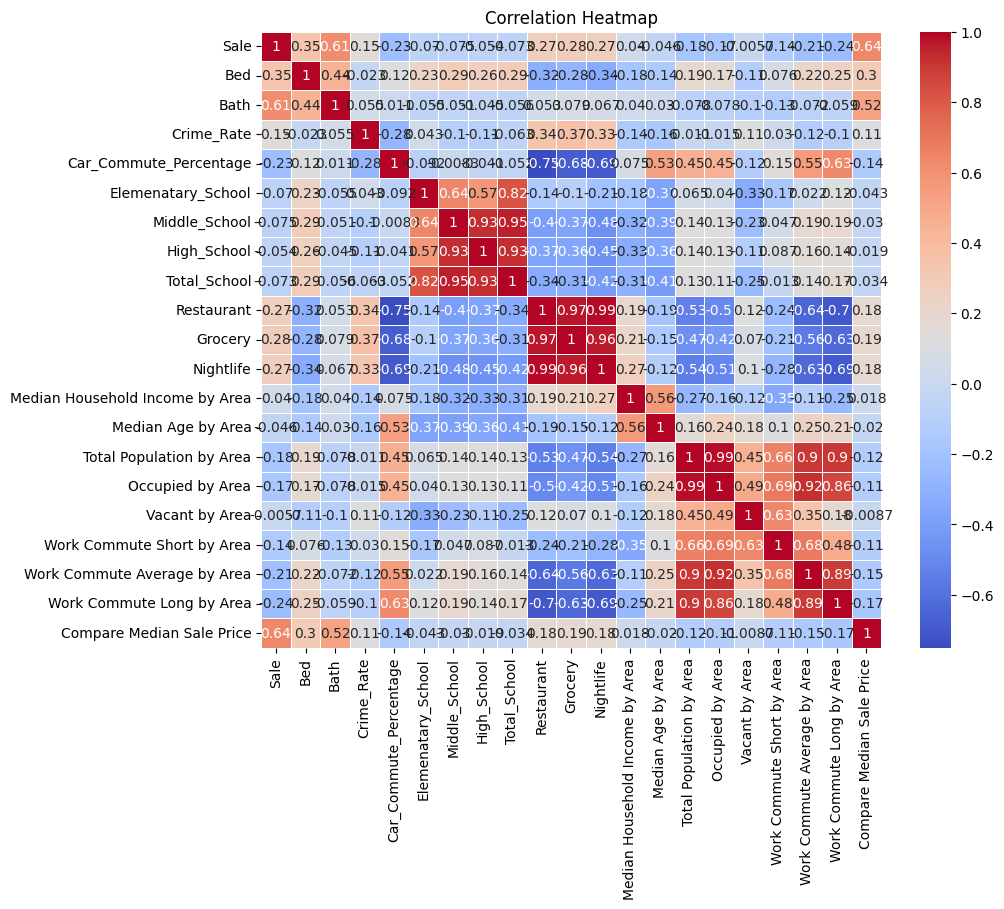

In [57]:
corr_matrix = final_df.drop('Area', axis = 1).corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) 
plt.title('Correlation Heatmap')

In [58]:
correlations = corr_matrix['Sale'].drop('Sale')
top_8_features = correlations.abs().sort_values(ascending=False).head(8)

print(top_8_features)

Compare Median Sale Price    0.636860
Bath                         0.613119
Bed                          0.345183
Grocery                      0.277510
Nightlife                    0.274149
Restaurant                   0.269739
Work Commute Long by Area    0.239123
Car_Commute_Percentage       0.227961
Name: Sale, dtype: float64


## Model Building

In [59]:
# train and test split
X = final_df[['Compare Median Sale Price', 'Bath', 'Bed', 'Grocery', 'Nightlife', 'Restaurant', 'Car_Commute_Percentage']]
y = final_df['Sale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [60]:
# scale data
std_slc = StandardScaler()
std_slc.fit(X_train)

X_train_std = std_slc.transform(X_train)
X_test_std = std_slc.transform(X_test)

### Linear Regression

In [61]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error (MSE): {mse}') 
r2 = r2_score(y_test, y_pred) 
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 14064995476.091335
R-squared (R²): 0.6601388179154841


### Lasso regression

In [63]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [64]:
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error (MSE): {mse}') 
r2 = r2_score(y_test, y_pred) 
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 14064997599.792627
R-squared (R²): 0.6601387665991767


### XGBoost

In [65]:
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred = xgboost.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
print(f'Mean Squared Error (MSE): {mse}') 
r2 = r2_score(y_test, y_pred) 
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 7620075221.183669
R-squared (R²): 0.815871410933144


## Pickle

In [67]:
# # linear regression model
# pickle_out = open("linear.pkl", "wb") 
# pickle.dump(linear, pickle_out) 
# pickle_out.close()

In [68]:
# # lasso regression model
# pickle_out = open("lasso.pkl", "wb") 
# pickle.dump(lasso, pickle_out) 
# pickle_out.close()

In [69]:
# # XGBoost regression model
# pickle_out = open("xgboost.pkl", "wb") 
# pickle.dump(xgboost, pickle_out) 
# pickle_out.close()